In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns


In [48]:
filename = "./Evaluation of generated prompts.csv"

df = pd.read_csv(filename)


In [49]:
# questionnaire conversion matrix 
#   for corresponding systems with response letters
# Systems 1-6 with responses A-F

matrix_q1 = {
    "A" : "6",
    "B" : "3",
    "C" : "1",
    "D" : "2",
    "E" : "4",
    "F" : "5",
}
matrix_q2 = {
    "A" : "6",
    "B" : "2",
    "C" : "1",
    "D" : "5",
    "E" : "4",
    "F" : "3",
}
matrix_q3 = {
    "A" : "3",
    "B" : "4",
    "C" : "1",
    "D" : "5",
    "E" : "6",
    "F" : "2",
}
matrix_q4 = {
    "A" : "2",
    "B" : "3",
    "C" : "5",
    "D" : "4",
    "E" : "1",
    "F" : "6",
}
matrix_q5 = {
    "A" : "6",
    "B" : "4",
    "C" : "2",
    "D" : "3",
    "E" : "1",
    "F" : "5",
}
matrix_q6 = {
    "A" : "2",
    "B" : "6",
    "C" : "1",
    "D" : "5",
    "E" : "3",
    "F" : "4",
}
matrix_q7 = {
    "A" : "2",
    "B" : "5",
    "C" : "6",
    "D" : "4",
    "E" : "1",
    "F" : "3",
}

matrix_all = [matrix_q1, matrix_q2, matrix_q3, matrix_q4, matrix_q5, matrix_q6, matrix_q7]


In [50]:
for col in df.columns:

    if pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].str.replace('st', '', regex=False) \
                        .str.replace('nd', '', regex=False) \
                        .str.replace('rd', '', regex=False) \
                        .str.replace('th', '', regex=False) \
                        .str.replace('Response ', '', regex=False)




In [51]:
df.head()

,Timestamp,Are you an employee of Mia Health?,"Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response A]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response B]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response C]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response D]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response E]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response F]","Question 1/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Correctness]","Question 1/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Personalization]",...,"Question 6/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Follow instructions]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response A]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response B]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response C]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response D]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response E]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response F]","Question 7/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Correctness]","Question 7/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Personalization]","Question 7/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Follow instructions]"
0,2025/06/16 9:03:55 pm EEST,No,1,2,6,4,5,3,A,C,...,A,1,2,4,5,6,3,B,B,C
1,2025/06/17 3:20:25 pm EEST,No,1,5,6,4,3,2,A,F,...,E,2,1,5,4,6,3,A,A,A
2,2025/06/18 12:23:48 pm EEST,Yes,2,3,4,6,5,1,F,F,...,D,5,1,3,2,4,6,B,B,B
3,2025/06/19 10:38:20 am EEST,No,2,3,6,5,4,1,F,F,...,B,6,1,2,4,3,5,B,C,A
4,2025/06/20 10:16:10 am EEST,Yes,2,4,5,6,3,1,C,F,...,D,6,1,5,4,2,3,F,B,A


In [52]:
q1_cols = df.filter(like="Question 1/7")
q2_cols = df.filter(like="Question 2/7")
q3_cols = df.filter(like="Question 3/7")
q4_cols = df.filter(like="Question 4/7")
q5_cols = df.filter(like="Question 5/7")
q6_cols = df.filter(like="Question 6/7")
q7_cols = df.filter(like="Question 7/7")

correctness_cols = df.filter(like="[Correctness]")
personalization_cols = df.filter(like="[Personalization]")
follow_instructions_cols = df.filter(like="[Follow instructions]")
tone_of_voice_cols = df.filter(like="[Tone of voice]")

In [99]:
df

,Timestamp,Are you an employee of Mia Health?,"Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response A]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response B]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response C]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response D]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response E]","Question 1/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response F]","Question 1/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Correctness]","Question 1/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Personalization]",...,"Question 6/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Follow instructions]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response A]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response B]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response C]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response D]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response E]","Question 7/7: Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response F]","Question 7/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Correctness]","Question 7/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Personalization]","Question 7/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Follow instructions]"
0,2025/06/16 9:03:55 pm EEST,No,1,2,6,4,5,3,A,C,...,A,1,2,4,5,6,3,B,B,C
1,2025/06/17 3:20:25 pm EEST,No,1,5,6,4,3,2,A,F,...,E,2,1,5,4,6,3,A,A,A
2,2025/06/18 12:23:48 pm EEST,Yes,2,3,4,6,5,1,F,F,...,D,5,1,3,2,4,6,B,B,B
3,2025/06/19 10:38:20 am EEST,No,2,3,6,5,4,1,F,F,...,B,6,1,2,4,3,5,B,C,A
4,2025/06/20 10:16:10 am EEST,Yes,2,4,5,6,3,1,C,F,...,D,6,1,5,4,2,3,F,B,A
5,2025/06/21 2:55:56 pm EEST,NaN,1,5,4,6,3,2,C,F,...,F,4,3,2,1,5,6,E,B,A
6,2025/06/21 3:03:36 pm EEST,No,2,1,4,6,3,5,A,D,...,C,1,5,2,3,4,6,E,B,D
7,2025/06/21 3:14:02 pm EEST,No,2,3,4,6,5,1,F,F,...,D,6,1,2,3,4,5,B,B,B
8,2025/06/21 4:10:45 pm EEST,No,1,2,4,5,6,3,A,B,...,A,2,1,5,4,6,3,A,B,A
9,2025/06/22 6:27:27 pm EEST,No,4,3,5,6,1,2,F,E,...,D,2,1,6,5,4,3,B,B,B


In [118]:
all_general_ratings_cols = df.filter(like="[Response")

all_general_ratings_cols.columns = all_general_ratings_cols.columns \
    .str.replace(
        ": Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response", 
        "", 
        regex=False) \
    .str.replace(
        ":  Please give a general rank to each response, where your most preferred is 1st and least preferred is 6th etc. [Response", 
        "", 
        regex=False) \
    .str.replace(
        "]", 
        "", 
        regex=False) \
    .str.replace(
        "/7 ", 
        "", 
        regex=False) \
    .str.replace(
        "Question ", 
        "", 
        regex=False)

In [ ]:
all_general_ratings_cols

,1A,1B,1C,1D,1E,1F,2A,2B,2C,2D,...,6C,6D,6E,6F,7A,7B,7C,7D,7E,7F
0,1,2,6,4,5,3,1,6,5,4,...,2,3,4,5,1,2,4,5,6,3
1,1,5,6,4,3,2,1,3,6,2,...,3,2,5,6,2,1,5,4,6,3
2,2,3,4,6,5,1,2,5,3,1,...,3,1,6,4,5,1,3,2,4,6
3,2,3,6,5,4,1,2,6,4,3,...,3,2,4,5,6,1,2,4,3,5
4,2,4,5,6,3,1,1,4,3,2,...,3,1,4,6,6,1,5,4,2,3
5,1,5,4,6,3,2,5,6,1,2,...,6,1,3,4,4,3,2,1,5,6
6,2,1,4,6,3,5,5,6,4,3,...,3,4,5,1,1,5,2,3,4,6
7,2,3,4,6,5,1,1,6,5,2,...,4,1,3,5,6,1,2,3,4,5
8,1,2,4,5,6,3,3,1,4,2,...,4,2,6,5,2,1,5,4,6,3
9,4,3,5,6,1,2,3,2,4,1,...,6,1,3,5,2,1,6,5,4,3


In [135]:
matrix_all

[{'A': '6', 'B': '3', 'C': '1', 'D': '2', 'E': '4', 'F': '5'},
 {'A': '6', 'B': '2', 'C': '1', 'D': '5', 'E': '4', 'F': '3'},
 {'A': '3', 'B': '4', 'C': '1', 'D': '5', 'E': '6', 'F': '2'},
 {'A': '2', 'B': '3', 'C': '5', 'D': '4', 'E': '1', 'F': '6'},
 {'A': '6', 'B': '4', 'C': '2', 'D': '3', 'E': '1', 'F': '5'},
 {'A': '2', 'B': '6', 'C': '1', 'D': '5', 'E': '3', 'F': '4'},
 {'A': '2', 'B': '5', 'C': '6', 'D': '4', 'E': '1', 'F': '3'}]

In [139]:
records = []

for i, row in all_general_ratings_cols.iterrows():
    # print(i)
    # print(row)

    for key, value in row.items():
        print("\n\n", key, value, i)
    
        q = int(key[0])
        mapping = matrix_all[q - 1]
        letter = key[1]
        system = mapping[letter]
        rating = value

        print("q: ", q)
        print("letter: ", letter)
        print("system: ", system)
        print("rating: ", rating)

        records.append({
            "Question": q,
            "System": system,
            "Rank": rating
        })

df_general_ratings = pd.DataFrame(records)



 1A 1 0
q:  1
letter:  A
system:  6
rating:  1


 1B 2 0
q:  1
letter:  B
system:  3
rating:  2


 1C 6 0
q:  1
letter:  C
system:  1
rating:  6


 1D 4 0
q:  1
letter:  D
system:  2
rating:  4


 1E 5 0
q:  1
letter:  E
system:  4
rating:  5


 1F 3 0
q:  1
letter:  F
system:  5
rating:  3


 2A 1 0
q:  2
letter:  A
system:  6
rating:  1


 2B 6 0
q:  2
letter:  B
system:  2
rating:  6


 2C 5 0
q:  2
letter:  C
system:  1
rating:  5


 2D 4 0
q:  2
letter:  D
system:  5
rating:  4


 2E 2 0
q:  2
letter:  E
system:  4
rating:  2


 2F 3 0
q:  2
letter:  F
system:  3
rating:  3


 3A 3 0
q:  3
letter:  A
system:  3
rating:  3


 3B 2 0
q:  3
letter:  B
system:  4
rating:  2


 3C 1 0
q:  3
letter:  C
system:  1
rating:  1


 3D 4 0
q:  3
letter:  D
system:  5
rating:  4


 3E 5 0
q:  3
letter:  E
system:  6
rating:  5


 3F 6 0
q:  3
letter:  F
system:  2
rating:  6


 4A 6 0
q:  4
letter:  A
system:  2
rating:  6


 4B 5 0
q:  4
letter:  B
system:  3
rating:  5


 4C 1 0
q:  4
lett

In [162]:
df_general_ratings["Rank"] = pd.to_numeric(df_general_ratings["Rank"], errors="coerce")
df_general_ratings["Question"] = pd.to_numeric(df_general_ratings["Question"], errors="coerce")
df_general_ratings["System"] = pd.to_numeric(df_general_ratings["System"], errors="coerce")

In [163]:
df_general_ratings

,Question,System,Rank
0,1,6,1
1,1,3,2
2,1,1,6
3,1,2,4
4,1,4,5
...,...,...,...
793,7,5,1
794,7,6,2
795,7,4,3
796,7,1,4


In [237]:
colors = sns.color_palette("muted")
colors = sns.color_palette("Set2")
colors

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

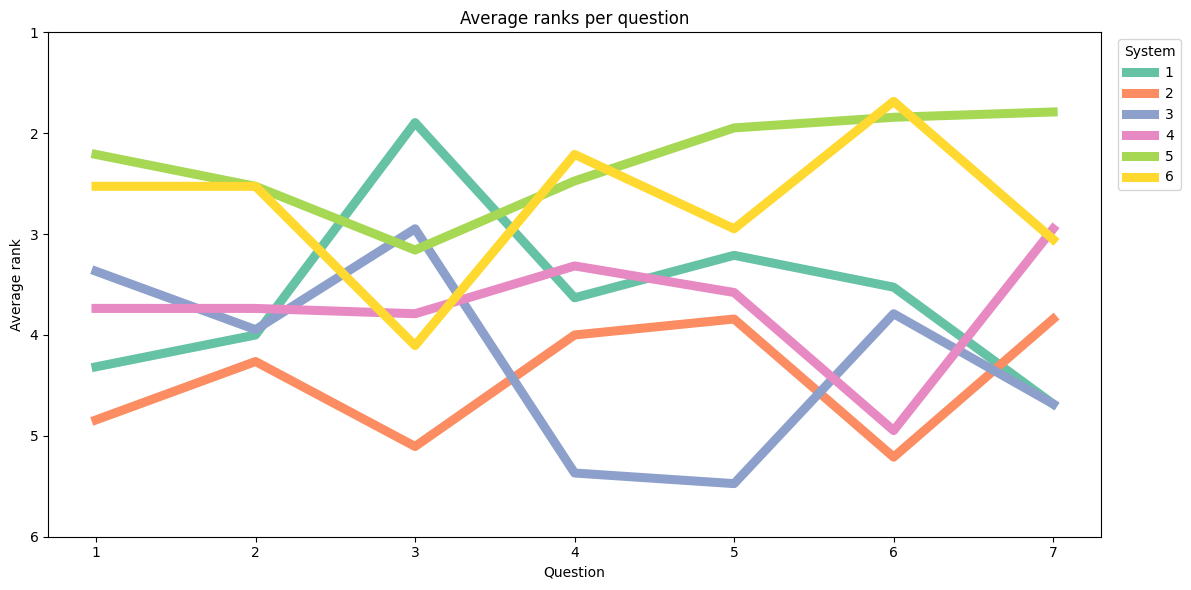

In [ ]:

avg_ranks = df_general_ratings.groupby(["Question", "System"])["Rank"].mean().reset_index()

pivot = avg_ranks.pivot(index="Question", columns="System", values="Rank")

pivot.plot(marker='', markersize=10, linewidth=6.5, figsize=(12, 6), color=colors)

plt.ylim(1, 6) 
plt.gca().invert_yaxis()  # Lower rank = better
plt.title("Average ranks per question")
plt.xlabel("Question")
plt.ylabel("Average rank")
plt.legend(title="System", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()



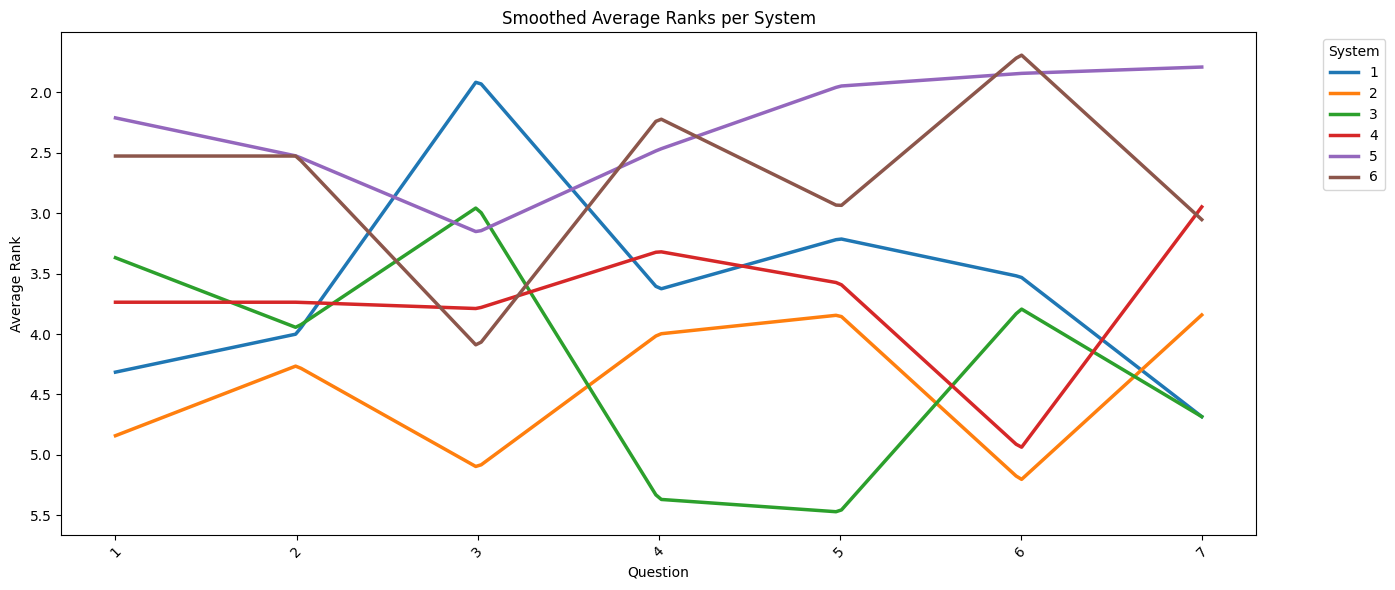

In [206]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Make sure avg_ranks is sorted by Question
avg_ranks = avg_ranks.sort_values(by="Question")

systems = avg_ranks["System"].unique()
questions = sorted(avg_ranks["Question"].unique())
question_nums = np.arange(len(questions))  # numeric x-axis

plt.figure(figsize=(14, 6))

for system in systems:
    df_sys = avg_ranks[avg_ranks["System"] == system]
    x = [questions.index(q) for q in df_sys["Question"]]  # numeric x
    y = df_sys["Rank"].values

    # Only interpolate if enough points
    if len(x) >= 4:
        x_new = np.linspace(min(x), max(x), 200)  # more x points
        spline = make_interp_spline(x, y, k=1)    # cubic spline
        y_smooth = spline(x_new)
        plt.plot(x_new, y_smooth, label=system, linewidth=2.5)
    else:
        plt.plot(x, y, label=system, marker='o', linestyle='--')  # fallback

plt.gca().invert_yaxis()
plt.xticks(ticks=np.arange(len(questions)), labels=questions, rotation=45)
plt.title("Smoothed Average Ranks per System")
plt.xlabel("Question")
plt.ylabel("Average Rank")
plt.legend(title="System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


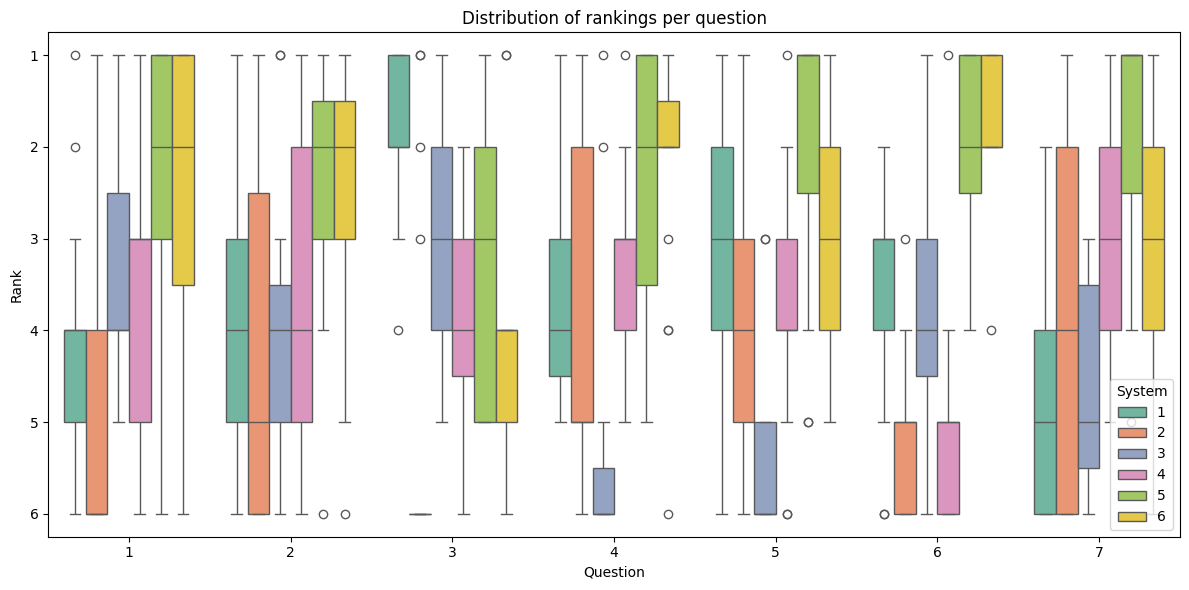

In [244]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_general_ratings, x="Question", y="Rank", hue="System", palette="Set2")
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Distribution of rankings per question")
plt.tight_layout()
plt.show()



## Compare RAG vs Agentic

In [281]:
system_group_map = {
    1: "baseline",
    2: "rag",
    3: "agentic",
    4: "baseline",
    5: "rag",
    6: "agentic",
}
LLM_group_map = {
    1: "llama 3.2",
    2: "llama 3.2",
    3: "llama 3.2",
    4: "gemini 2.5 flash",
    5: "gemini 2.5 flash",
    6: "gemini 2.5 flash",
}

In [282]:
df_general_ratings["System_group"] = df_general_ratings["System"].map(system_group_map)
df_general_ratings["LLM_group"] = df_general_ratings["System"].map(LLM_group_map)

In [284]:
df_general_ratings["System_group"] = pd.Categorical(df_general_ratings["System_group"], categories=["baseline", "rag", "agentic"], ordered=True)

In [285]:
df_general_ratings

,Question,System,Rank,System_group,LLM_group
0,1,6,1,agentic,gemini 2.5 flash
1,1,3,2,agentic,llama 3.2
2,1,1,6,baseline,llama 3.2
3,1,2,4,rag,llama 3.2
4,1,4,5,baseline,gemini 2.5 flash
...,...,...,...,...,...
793,7,5,1,rag,gemini 2.5 flash
794,7,6,2,agentic,gemini 2.5 flash
795,7,4,3,baseline,gemini 2.5 flash
796,7,1,4,baseline,llama 3.2


C:\Users\willi\AppData\Local\Temp\ipykernel_45400\3410770444.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ranks_system = df_general_ratings.groupby(["Question", "System_group"])["Rank"].mean().reset_index()


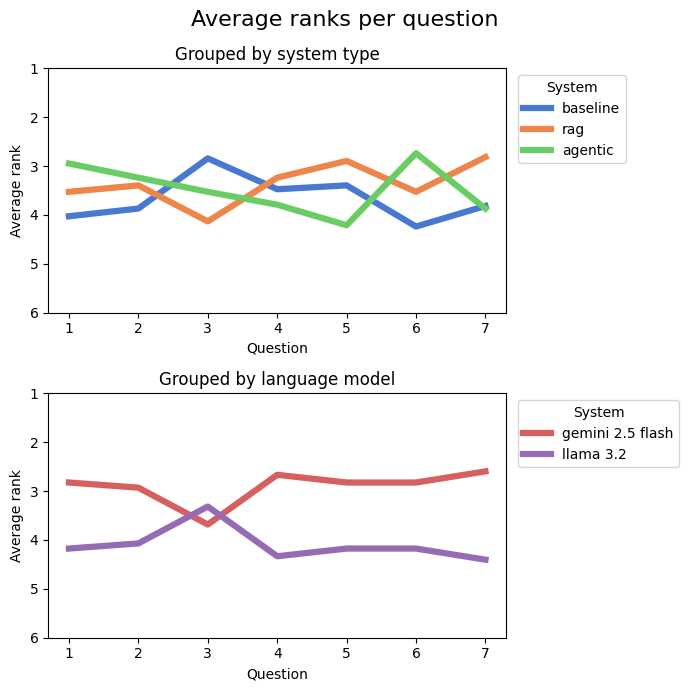

In [349]:
avg_ranks_system = df_general_ratings.groupby(["Question", "System_group"])["Rank"].mean().reset_index()
avg_ranks_llm = df_general_ratings.groupby(["Question", "LLM_group"])["Rank"].mean().reset_index()

pivot_system = avg_ranks_system.pivot(index="Question", columns="System_group", values="Rank")
pivot_llm = avg_ranks_llm.pivot(index="Question", columns="LLM_group", values="Rank")

fig, axs = plt.subplots(2, 1, figsize=(7, 7))

# pivot_system.plot(marker='', markersize=10, linewidth=6.5, figsize=(7, 4), color=sns.color_palette("muted")[:])
# pivot_llm.plot(marker='', markersize=10, linewidth=6.5, figsize=(7, 4), color=sns.color_palette("muted")[3:])       #bright6

pivot_system.plot(ax=axs[0], marker='', markersize=10, linewidth=4.5, color=sns.color_palette("muted")[:])
axs[0].set_ylim(1, 6) 
axs[0].invert_yaxis()  # Lower rank = better
axs[0].set_title("Grouped by system type")
axs[0].set_xlabel("Question")
axs[0].set_ylabel("Average rank")
axs[0].legend(title="System", bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

pivot_llm.plot(ax=axs[1], marker='', markersize=10, linewidth=4.5, color=sns.color_palette("muted")[3:])       #bright6
axs[1].set_ylim(1, 6) 
axs[1].invert_yaxis()  # Lower rank = better
axs[1].set_title("Grouped by language model")
axs[1].set_xlabel("Question")
axs[1].set_ylabel("Average rank")
axs[1].legend(title="System", bbox_to_anchor=(1.01, 1), loc='upper left')

fig.suptitle("Average ranks per question", fontsize=16)
plt.tight_layout()
plt.show()


# plt.ylim(1, 6) 
# plt.gca().invert_yaxis()  # Lower rank = better
# plt.title("Average ranks per question")
# plt.xlabel("Question")
# plt.ylabel("Average rank")
# plt.legend(title="System", bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.tight_layout()
# plt.show()



# plt.ylim(1, 6) 
# plt.gca().invert_yaxis()  # Lower rank = better
# plt.title("Average ranks per question")
# plt.xlabel("Question")
# plt.ylabel("Average rank")
# plt.legend(title="System", bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


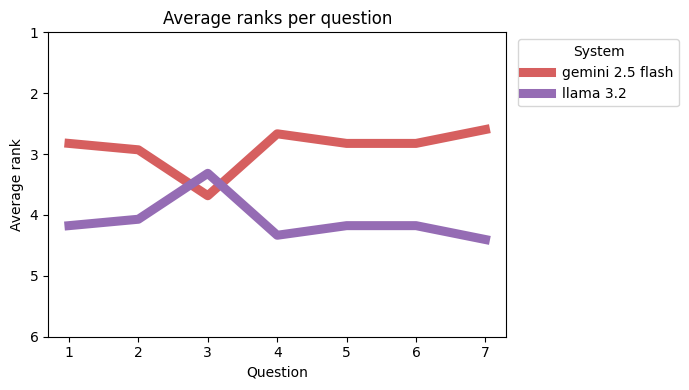

In [ ]:
avg_ranks_llm = df_general_ratings.groupby(["Question", "LLM_group"])["Rank"].mean().reset_index()

pivot = avg_ranks_llm.pivot(index="Question", columns="LLM_group", values="Rank")

pivot.plot(marker='', markersize=10, linewidth=6.5, figsize=(7, 4), color=sns.color_palette("muted")[3:])# , color=sns.color_palette("bright6"))

plt.ylim(1, 6) 
plt.gca().invert_yaxis()  # Lower rank = better
plt.title("Average ranks per question")
plt.xlabel("Question")
plt.ylabel("Average rank")
plt.legend(title="System", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

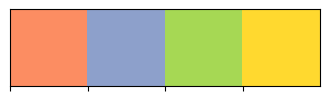

In [254]:
colors_rag_agentic = colors[1:3] + colors[4:6]
sns.palplot(colors_rag_agentic)

## Compare compute time

In [372]:
all_compute_times = [
5.35,
65.6,
53.99,
3.31,
7.39,
4.15,
6.89,
55.12,
48.82,
2.1,
9.18,
4.09,
21.84,
61.3,
42.71,
0.64,
1.01,
16.03,
4.79,
55.15,
12.73,
2.16,
2.97,
3.29,
8.91,
49.02,
41.6,
1.95,
5.77,
6.89,
30.82,
43.77,
42.24,
5.91,
7.13,
13.69,
6.34,
52.12,
50.42,
3.84,
5.9,
3.04]

In [376]:
question_number_map = {
    1:4,
    2:5,
    3:1,
    4:6,
    5:7,
    6:2,
    7:3
}

In [377]:
results_compute_times = []

for i, val in enumerate(all_compute_times):
    system = ( i % 6 ) + 1
    q = (i // 6) + 1
    # print(system, q, val)

    results_compute_times.append({
        "Question":question_number_map[q],
        "System":system,
        "Compute_time":val
    })


df_compute_times = pd.DataFrame(results_compute_times)



In [378]:
df_compute_times

,Question,System,Compute_time
0,4,1,5.35
1,4,2,65.60
2,4,3,53.99
3,4,4,3.31
4,4,5,7.39
5,4,6,4.15
6,5,1,6.89
7,5,2,55.12
8,5,3,48.82
9,5,4,2.10


## Compare MIA vs non-experts

## Correctness, Personalization, Follow instructions, Tone of voice

In [70]:
correctness_combined_scores = {
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0
}

for i, col in enumerate(correctness_cols.columns):
    all_q_options = ["A", "B", "C", "D", "E", "F"]
    v = correctness_cols[col].value_counts(dropna=False)
    v = v.reindex(all_q_options, fill_value=0)
    
    print(v)
    # print(v["A"])
    # matrix = matrix_all[i]
    # print(matrix)
    # sys1 = matrix[v["A"]]
    # print(sys1)
    for char, sys in matrix_all[i].items():
        print(char, sys)
        correctness_combined_scores[sys] += v[char]


Question 1/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Correctness]
A    5
B    0
C    3
D    2
E    0
F    9
Name: count, dtype: int64
A 6
B 3
C 1
D 2
E 4
F 5
Question 2/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Correctness]
A    4
B    4
C    4
D    5
E    1
F    1
Name: count, dtype: int64
A 6
B 2
C 1
D 5
E 4
F 3
Question 3/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Correctness]
A    7
B    0
C    7
D    2
E    1
F    2
Name: count, dtype: int64
A 3
B 4
C 1
D 5
E 6
F 2
Question 4/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Correctness]
A    6
B    1
C    8
D    0
E    1
F    3
Name: count, dtype: int64
A 2
B 3
C 5
D 4

In [71]:
personalization_combined_scores = {
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0
}

for i, col in enumerate(personalization_cols.columns):
    all_q_options = ["A", "B", "C", "D", "E", "F"]
    v = personalization_cols[col].value_counts(dropna=False)
    v = v.reindex(all_q_options, fill_value=0)
    
    print(v)
    # print(v["A"])
    # matrix = matrix_all[i]
    # print(matrix)
    # sys1 = matrix[v["A"]]
    # print(sys1)
    for char, sys in matrix_all[i].items():
        print(char, sys)
        personalization_combined_scores[sys] += v[char]

Question 1/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Personalization]
A     1
B     1
C     1
D     4
E     1
F    11
Name: count, dtype: int64
A 6
B 3
C 1
D 2
E 4
F 5
Question 2/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Personalization]
A    4
B    9
C    2
D    4
E    0
F    0
Name: count, dtype: int64
A 6
B 2
C 1
D 5
E 4
F 3
Question 3/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Personalization]
A    1
B    1
C    4
D    8
E    2
F    3
Name: count, dtype: int64
A 3
B 4
C 1
D 5
E 6
F 2
Question 4/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Personalization]
A     4
B     1
C    10
D     1
E     3
F     0
Name: count, 

In [72]:
follow_instructions_combined_scores = {
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0
}

for i, col in enumerate(follow_instructions_cols.columns):
    all_q_options = ["A", "B", "C", "D", "E", "F"]
    v = follow_instructions_cols[col].value_counts(dropna=False)
    v = v.reindex(all_q_options, fill_value=0)
    
    print(v)
    # print(v["A"])
    # matrix = matrix_all[i]
    # print(matrix)
    # sys1 = matrix[v["A"]]
    # print(sys1)
    for char, sys in matrix_all[i].items():
        print(char, sys)
        follow_instructions_combined_scores[sys] += v[char]

Question 1/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Follow instructions]
A    3
B    1
C    2
D    4
E    2
F    7
Name: count, dtype: int64
A 6
B 3
C 1
D 2
E 4
F 5
Question 2/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Follow instructions]
A    2
B    6
C    5
D    5
E    1
F    0
Name: count, dtype: int64
A 6
B 2
C 1
D 5
E 4
F 3
Question 3/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Follow instructions]
A    5
B    0
C    4
D    4
E    2
F    4
Name: count, dtype: int64
A 3
B 4
C 1
D 5
E 6
F 2
Question 4/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions) [Follow instructions]
A    6
B    0
C    8
D    1
E    2
F    2
Name: cou

In [74]:
tone_of_voice_combined_scores = {
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0
}

for i, col in enumerate(tone_of_voice_cols.columns):
    all_q_options = ["A", "B", "C", "D", "E", "F"]
    v = tone_of_voice_cols[col].value_counts(dropna=False)
    v = v.reindex(all_q_options, fill_value=0)
    
    print(v)
    # print(v["A"])
    # matrix = matrix_all[i]
    # print(matrix)
    # sys1 = matrix[v["A"]]
    # print(sys1)
    for char, sys in matrix_all[i].items():
        print(char, sys)
        tone_of_voice_combined_scores[sys] += v[char]

Question 1/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Tone of voice]
A    1
B    7
C    2
D    1
E    0
F    8
Name: count, dtype: int64
A 6
B 3
C 1
D 2
E 4
F 5
Question 2/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Tone of voice]
A    3
B    6
C    4
D    2
E    1
F    3
Name: count, dtype: int64
A 6
B 2
C 1
D 5
E 4
F 3
Question 3/7: Please select which response scored best in the different categories (Correctness, Personalization, Follow instructions, Tone of voice) [Tone of voice]
A    4
B    0
C    7
D    3
E    2
F    3
Name: count, dtype: int64
A 3
B 4
C 1
D 5
E 6
F 2


In [40]:
follow_instructions_combined_scores = {k: v / (df.shape[0] * 7) for k, v in follow_instructions_combined_scores.items()}

In [75]:
print(correctness_combined_scores)
print(personalization_combined_scores)
print(follow_instructions_combined_scores)
print(tone_of_voice_combined_scores)

{'1': 20, '2': 25, '3': 12, '4': 2, '5': 52, '6': 22}
{'1': 15, '2': 24, '3': 4, '4': 6, '5': 65, '6': 19}
{'1': 14, '2': 37, '3': 8, '4': 8, '5': 49, '6': 17}
{'1': 13, '2': 10, '3': 14, '4': 1, '5': 13, '6': 6}


In [ ]:

baseline_keys = [1, 4]
rag_keys = [2, 5]
agentic_keys = [3, 6]

print(correctness_combined_scores)

correctness_combined_baseline = {k: correctness_combined_scores[str(k)] for k in baseline_keys}
correctness_combined_rag = {k: correctness_combined_scores[str(k)] for k in rag_keys}
correctness_combined_agentic = {k: correctness_combined_scores[str(k)] for k in agentic_keys}

print(correctness_combined_baseline)
print(correctness_combined_rag)
print(correctness_combined_agentic)


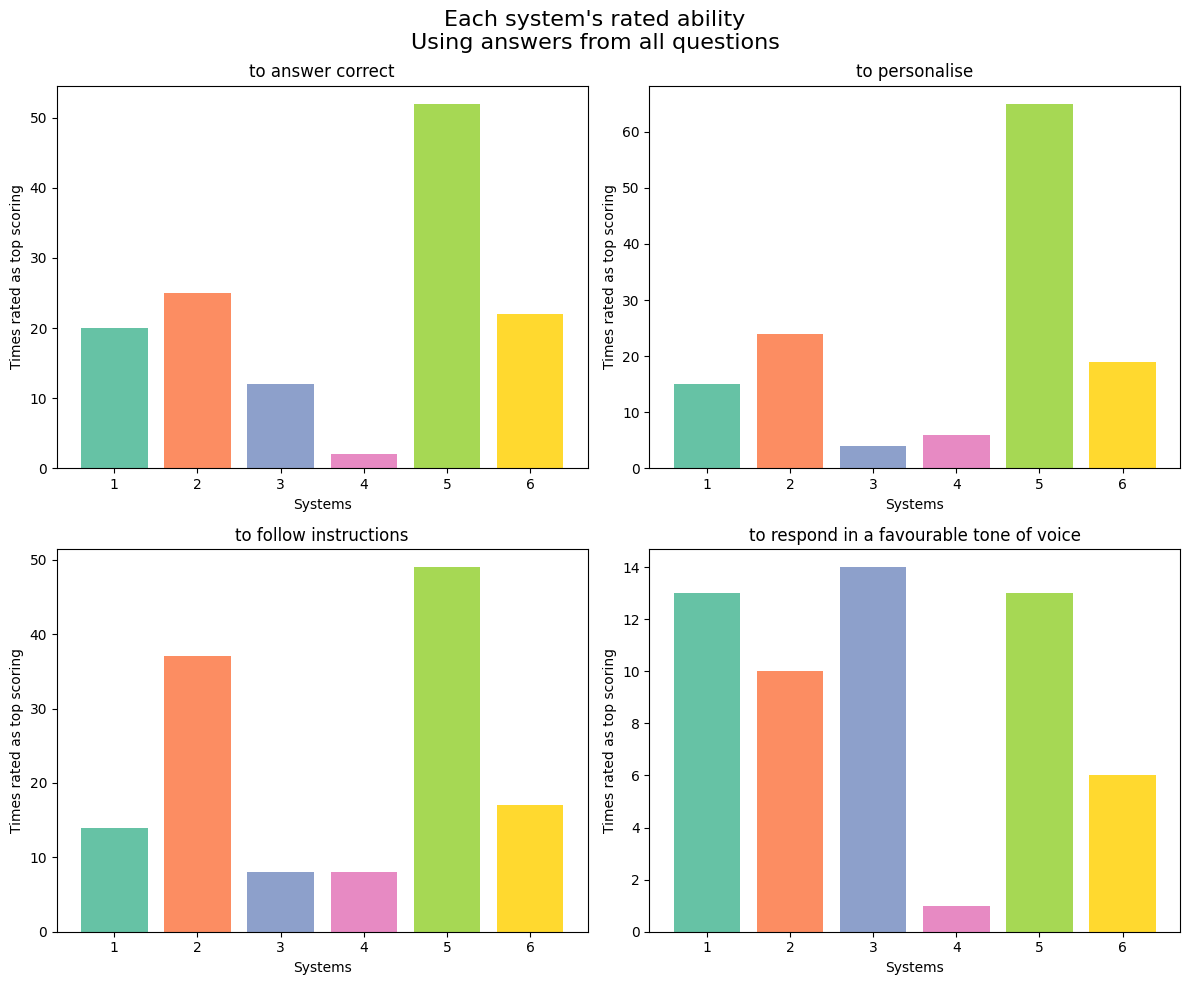

In [271]:

# plt.bar(follow_instructions_combined_scores.keys(), follow_instructions_combined_scores.values())
# plt.xlabel("Systems")
# plt.ylabel("Times rated as top scoring")
# plt.title("Each system's rated ability to follow instructions across all questions")
# # plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# axs[0, 0].bar(correctness_combined_baseline.keys(), correctness_combined_baseline.values(),)
# axs[0, 0].bar(correctness_combined_rag.keys(), correctness_combined_rag.values(),  hatch="///")
# axs[0, 0].bar(correctness_combined_agentic.keys(), correctness_combined_agentic.values(), hatch="xxx")
axs[0, 0].bar(correctness_combined_scores.keys(), correctness_combined_scores.values(), color=colors)
axs[0, 0].set_xlabel("Systems")
axs[0, 0].set_ylabel("Times rated as top scoring")
axs[0, 0].set_title("to answer correct")
# axs[0].xticks(rotation=45)

axs[0, 1].bar(personalization_combined_scores.keys(), personalization_combined_scores.values(), color=colors)
axs[0, 1].set_xlabel("Systems")
axs[0, 1].set_ylabel("Times rated as top scoring")
axs[0, 1].set_title("to personalise")

axs[1, 0].bar(follow_instructions_combined_scores.keys(), follow_instructions_combined_scores.values(), color=colors)
axs[1, 0].set_xlabel("Systems")
axs[1, 0].set_ylabel("Times rated as top scoring")
axs[1, 0].set_title("to follow instructions")

axs[1, 1].bar(tone_of_voice_combined_scores.keys(), tone_of_voice_combined_scores.values(), color=colors)
axs[1, 1].set_xlabel("Systems")
axs[1, 1].set_ylabel("Times rated as top scoring")
axs[1, 1].set_title("to respond in a favourable tone of voice")

fig.suptitle("Each system's rated ability\nUsing answers from all questions", fontsize=16)
plt.tight_layout()
plt.show()
